# <span style = "color:Black"> **Recap & Goal**

- 최종목적은 20개의 클래스를 가지는 픽토그램 이미지를 잘 분류하는 모형을 만드는 것입니다.
- 분류모형을 잘 학습시키기 위해서는 학습에 악영향을 미치는 이상치를 제거해야합니다.
- 따라서 이전 모델은 모델은 픽셀값의 분포를 활용하여 픽토그램에서 이상치(실제사진)을 분류했습니다.
- 여기서는 또다른 방법인 `군집화`를 사용하여 이상치(실제사진)을 분류해내는 모형을 만듭니다.

# <span style = "color:black">**Import & Setup**

In [1]:
#| echo: false

import random
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
import torchvision
from torchvision import transforms
from scipy import stats
%matplotlib inline

import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import cv2
import os
import time
from tqdm import tqdm
from PIL import Image, ImageEnhance

import random
import os, sys
from albumentations import *
pckg_path = "C:/Users/22668/Desktop/github/sin-hoyeon/posts"
sys.path.append(pckg_path)

from creatorcamp.code.setup import *

import glob

In [2]:
#| echo: false

all_data=get_ts_data(path=inform['path'])
print(f'Dataset의 크기 : {len(all_data)}')
print(f'Dataset에 존재하는 클래스의 갯수 : {len(all_data.classes)}')
print(f'setup /n{inform}')

Dataset의 크기 : 25503
Dataset에 존재하는 클래스의 갯수 : 20
setup /n{'name': 'hoyeon', 'path': 'C:/Users/22668/Desktop/github/datasets/creatorcamp'}


______________________________________________

# <span style = "color:black"> **Working**

- 이미지와 실제사진은 서로 다른 특징을 가집니다.
- 이는 군집화를 하면 서로다른 그룹에 속할 것을 암시합니다.
- 따라서 이상치 검출모델을 만들기 위해 다음과 같은 가정을 했습니다.

::: {.callout-note icon=false}
## 가정
- 실제사진(이상치)와 픽토그램은 군집화를 하면 서로다른 그룹에 속할 것이다.
:::

- 여기서는 대표적인 군집화 방법인 Kmeans방법을 적용했습니다..

## <span style = "color:black">데이터 전처리

- 이미지가 3채널에 크기가 재각각이므로 Kmeans를 바로 적용하기가 쉽지 않았습니다.
- 그래서 크기가 $100 \times 100$이며 gray scale을 가지는 이미지로 바꿨습니다.

### <span style = "color:black"> 1. 크기변환 & 저장

In [42]:
#이미지의 크기를 100x100으로 변환하고 새로운 경로에 저장

# 모든파일을 주소를 가져옴
file_path = [path for path in glob.glob(inform["path"]+"/*") if ".csv" not in path]
save_path = "C:/Users/22668/Desktop/github/datasets/gray100x100"

#크기변환 & 저장
for f_path in file_path:
    cls_name = f_path.split("\\")[-1]
    new_f_path = save_path + "/" + cls_name
    os.mkdir(new_f_path)
    img_paths = glob.glob(f_path + "/*")
    for img_path in img_paths:
        img = Image.open(img_path)
        img_resize = img.resize((100,100))
        name = img_path.split("\\")[-1]
        new_img_path = save_path + "/" + cls_name + "/" + name
        img_resize.save(new_img_path)

### <span style = "color:black"> 2. gray scale로 변환하기

In [5]:
img_paths = glob.glob(save_path+"/*/*")

kmeans_img = []
for img_path in img_paths:
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kmeans_img.append(img_gray)
kmeans_img_array = np.array(kmeans_img)

In [ ]:
kmeans_img_array.shape        # 3채널 -> 1채널로 변환
kmeans_img_2d =kmeans_img_array.reshape(-1, 100*100)

(25503, 100, 100)

## <span style = "color:Black"> 모형 학습하기

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(init='random', n_clusters=2, random_state=42)
km.fit(kmeans_img_2d)

KMeans(init='random', n_clusters=2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

def draw(arr, ratio=1):
    n = len(arr)    
    rows = int(np.ceil(n/450))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: 
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

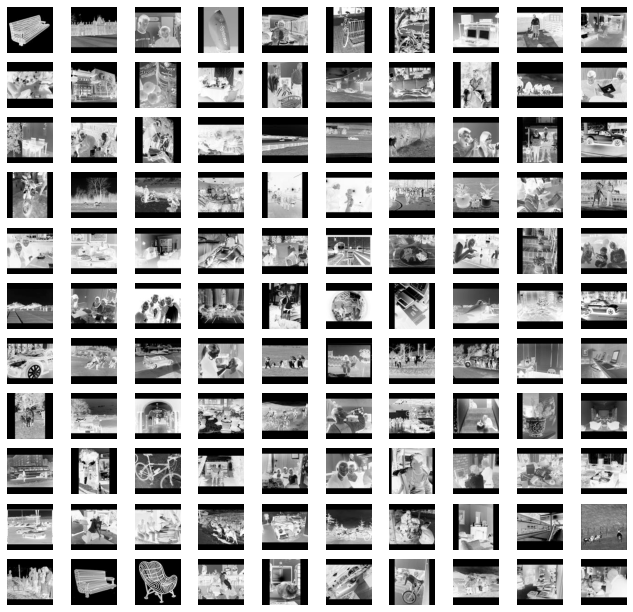

In [ ]:
# k-means 모델이 real image (0)라고 판단한 그림들 출력
draw(kmeans_img_array[km.labels_==0])

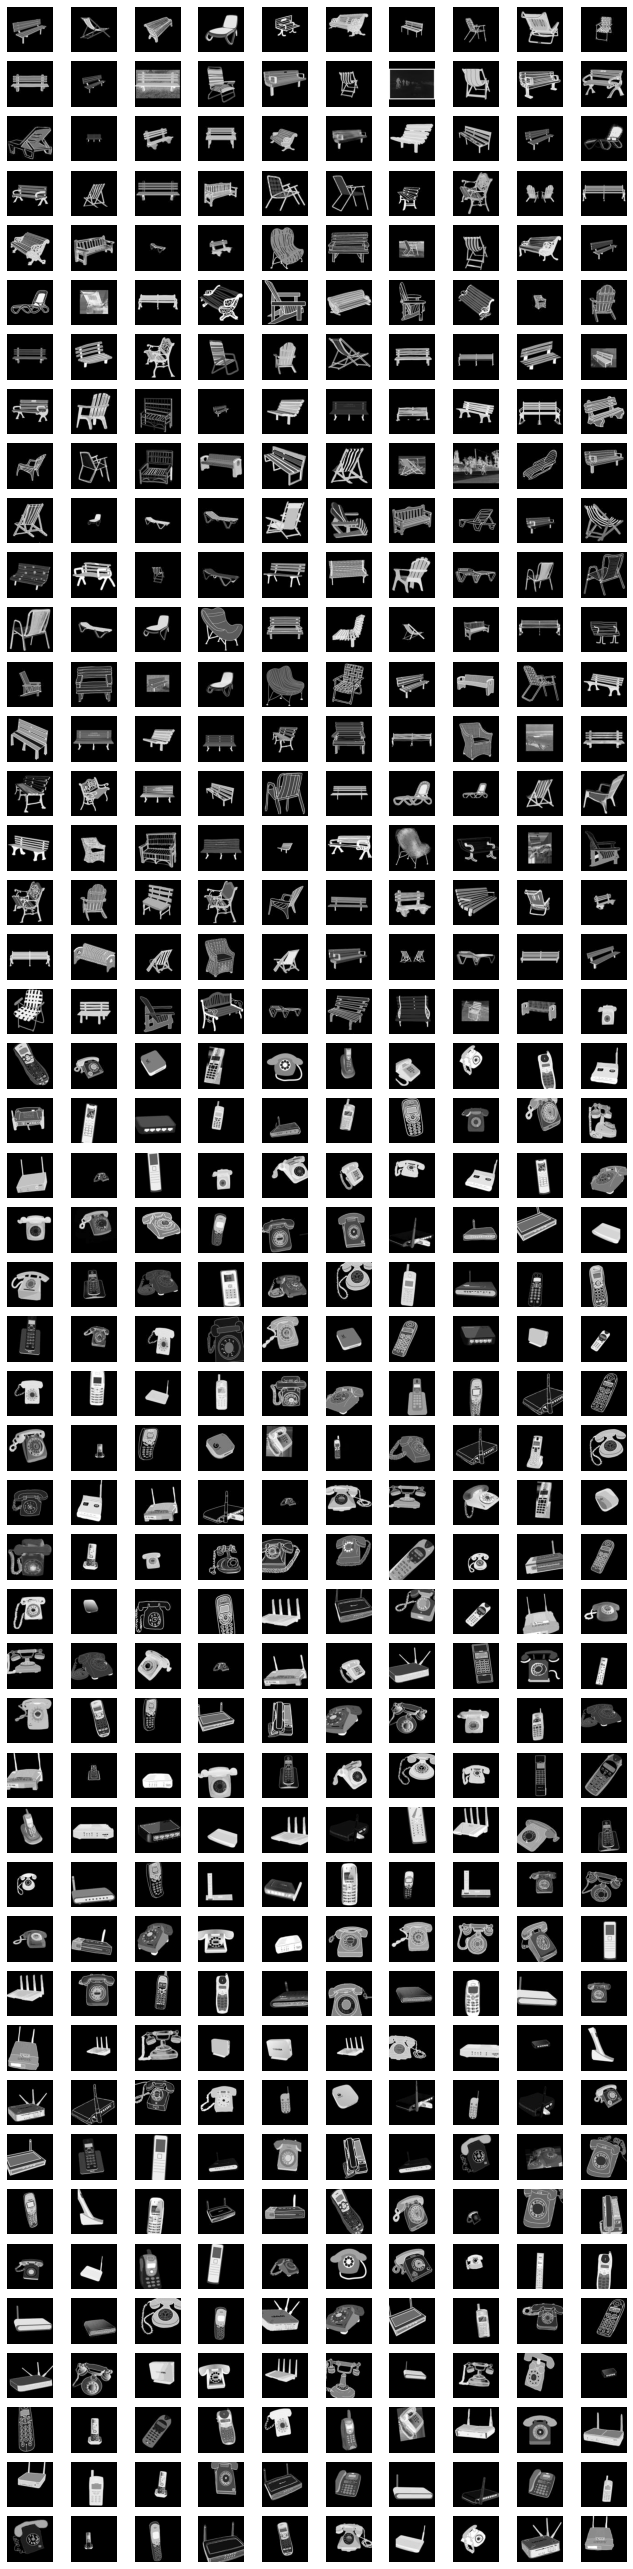

In [ ]:
# k-means 모델이 pictogram image (1)라고 판단한 그림들 출력
draw(kmeans_img_array[km.labels_==1])